In [19]:
import sys

sys.path.append("../")
sys.path.append("../src")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import networkx as nx
import pulser
from matplotlib import pyplot as plt
from networkx.algorithms import approximation
import ray
from ray import tune
from src.solver.opt_vqaa import VQAA
from src.solver.utils.graph_register import GraphRegister

In [26]:
ray.shutdown()
ray.init(num_cpus=8)

2024-01-22 19:46:43,245	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.11.0
Ray version:,2.9.0
Dashboard:,http://127.0.0.1:8265


In [22]:
def plot_distribution(counts, actual_solution):
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    color_dict = {key: "r" if key in actual_solution else "g" for key in counts}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(counts.keys(), counts.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()


REGISTER_FILE = "data/registers/9/9_mesh.json"

Maximum independent set of G: {8, 0, 2, 5}


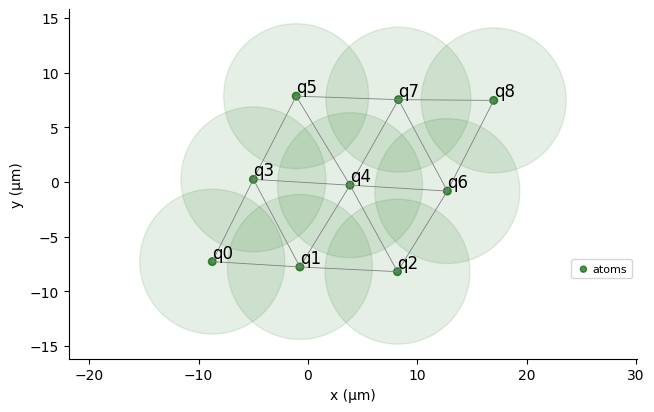

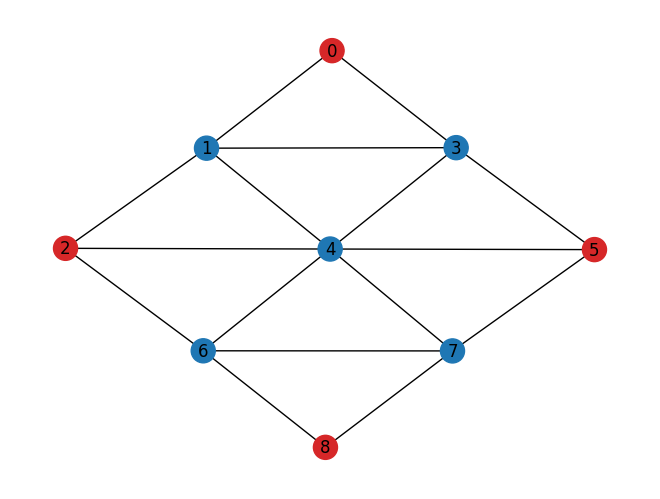

In [23]:
register = GraphRegister.from_json(REGISTER_FILE)

graph = register.graph

I = approximation.maximum_independent_set(graph)
num_nodes = graph.number_of_nodes()
bitstring = "".join("1" if node in I else "0" for node in range(num_nodes))

print(f"Maximum independent set of G: {I}")
register.draw(
    blockade_radius=pulser.devices.Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)
pos = nx.spring_layout(graph)
nx.draw(
    graph,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in graph],
)

QAA_scorer_19fe46c7
Best trial config: {'rise_time': 326, 'fall_time': 423, 'omega': 4.990216291614427, 'init_detuning': 3.0706737004280975, 'final_detuning': 7.82240553682601}
Best trial final validation score: 2.594673817085427


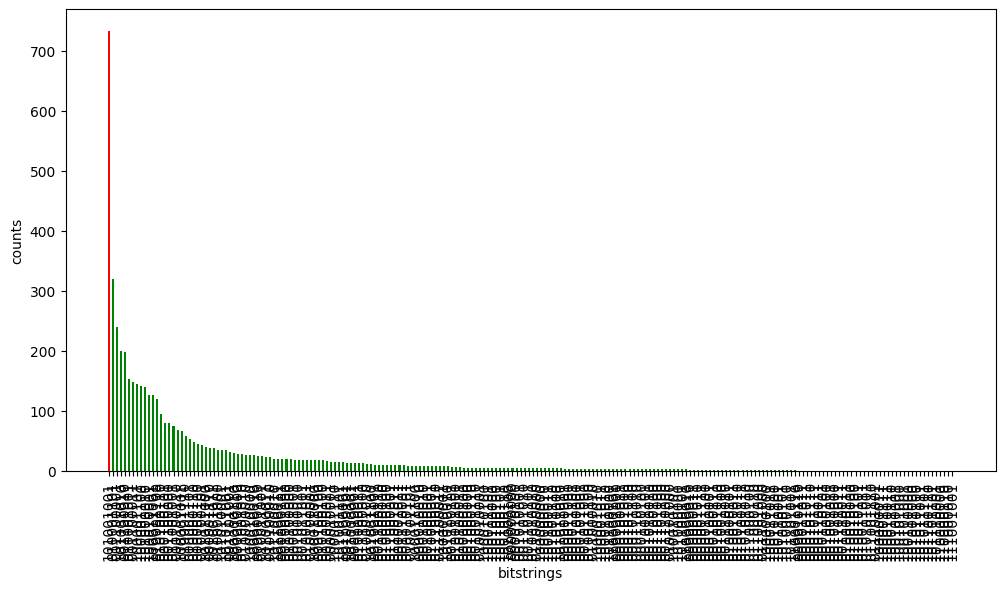

ResultScore(total=2.6320558506666667, gini_score=0.7668266666666667, sum_score=3.4324)


In [27]:
counts, result, params = VQAA(
    register_file=REGISTER_FILE, optimisation_rounds=30, store_results=True
)

plot_distribution(counts, bitstring)

print(result)

In [25]:
# Arrêt de Ray
ray.shutdown()